In [1]:
import matplotlib.pyplot as plt
from collision_detection import *
import matplotlib.animation as anim
from IPython.display import HTML

Suppose two vehicles are approximated with a single circle each. The center of one circle is at $(1.0 m, 3.0 m)$ and
the other is at $(4.0 m, 2.0 m)$. If the radius of both collision checking circles is $1.5 m$, will a collision be detected?

<class 'matplotlib.axes._axes.Axes'>


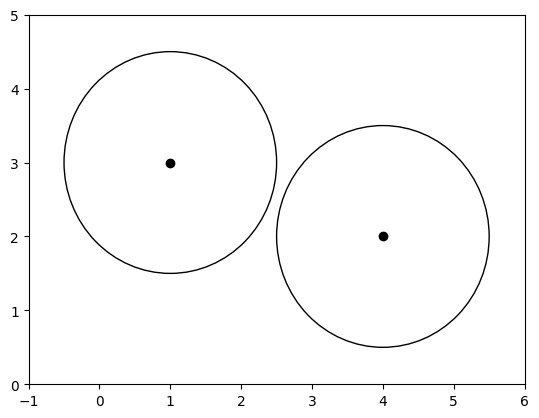

In [2]:
def plot_circle(point:Point,radius:float,plotter=plt):
    
    return plotter.Circle((point.x,point.y),radius, fill=False)
p1 = Point(1,3)
p2 = Point(4,2)
r = 1.5

fig, ax = plt.subplots() # note we must use plt.subplots, not plt.subplot

print(type(ax))
ax.add_patch(plot_circle(p1,r))
ax.add_patch(plot_circle(p2,r))

ax.scatter([p1.x,p2.x],[p1.y, p2.y], color="black")

ax.set_xlim((-1, 6))
ax.set_ylim((0, 5))
plt.show()

Suppose two vehicles, a leading vehicle and a following vehicle, are moving along a straight line. The center of the
leading vehicle is $20 m$ ahead of the center of the following vehicle. The leading vehicle is moving at $15 m/s$, and
the following vehicle is moving at $20 m/s$. The distance from the center to the front bumper of both vehicles is $2.5
m$, and the distance from the center to the rear bumper of both vehicles is $2.5 m$. What is the time to collision in
this scenario?

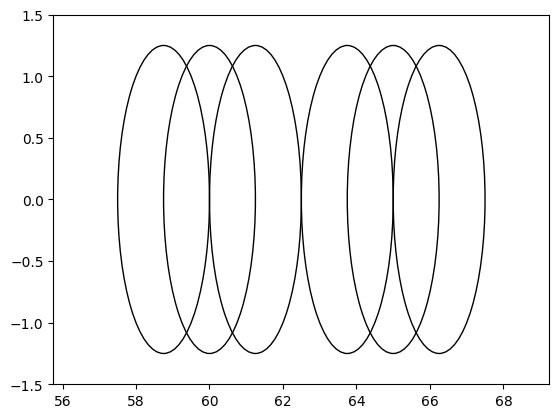

In [3]:
p_back = 0
p_leading = p_back+20
car_1 = SimpleCar(p_leading,2.5)
car_2 = SimpleCar(p_back,2.5)

fig, ax = plt.subplots()

dt = 3
vel_1 = 15.0
vel_2 = 20.0

car_1.movement(vel_1,dt)
car_2.movement(vel_2,dt)

car_1.generate_circles(ax)
car_2.generate_circles(ax)
    
set_plot_limits(car_1, car_2, ax)

In [4]:
car_1 = SimpleCar(p_leading,2.5)
car_2 = SimpleCar(p_back,2.5)
dt = 0.1
collision_t = 0

vel_1 = 15.0
vel_2 = 20.0
frames = 0
while not car_1.detect_collision(car_2):
    car_1.movement(vel_1,dt)
    car_2.movement(vel_2,dt)
    collision_t += dt
    frames += 1
print(collision_t)

3.0000000000000013


In [5]:
%%capture
fig = plt.figure()
ax = fig.add_subplot(111)

In [6]:

car_1 = SimpleCar(p_leading,2.5)
car_2 = SimpleCar(p_back,2.5)

car_1.generate_circles(ax)
car_2.generate_circles(ax)


def cars_update(i):
    ax.clear()
    
    car_1.movement(vel_1,dt)
    car_2.movement(vel_2,dt)
    
    set_plot_limits(car_1, car_2, ax)
    
    car_1.generate_circles(ax)
    car_2.generate_circles(ax)
    
coll_anim = anim.FuncAnimation(fig,cars_update,frames=frames-1, repeat=False)
HTML(coll_anim.to_html5_video())
